In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns 

In [3]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [7]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28 *28)
X_train.shape

(60000, 784)

In [14]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
X_train.max()
X_test.max()

255

In [18]:
X_train = X_train / 255
X_test = X_test / 255


In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss= "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train, y_train, epochs = 10)

C:\Users\sanjay\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8133 - loss: 0.7222
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9141 - loss: 0.3103
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9206 - loss: 0.2830
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9234 - loss: 0.2728
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9254 - loss: 0.2666
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9255 - loss: 0.2653
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9304 - loss: 0.2560
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9302 - loss: 0.2515
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9313 - loss: 0.2464
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9297 - loss: 0.2556


In [21]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9149 - loss: 0.3012


[0.26659873127937317, 0.9254999756813049]

In [22]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.0672988e-03, 1.2593843e-08, 1.1368472e-02, 9.7080809e-01,
       1.2156236e-03, 1.3960527e-01, 4.9335817e-08, 9.9980682e-01,
       6.1555330e-02, 6.2060720e-01], dtype=float32)

In [23]:
y_predicted[0].argmax()

7

In [24]:
y_test[0]

7

In [25]:
y_pred = [np.argmax(x) for x in y_predicted]

In [26]:
cm = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    0,    2,    0,    5,   11,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    5,    2,   12,    0],
       [   4,    9,  920,   19,    7,    4,   15,   10,   41,    3],
       [   2,    0,   13,  934,    1,   21,    3,   10,   19,    7],
       [   1,    1,    2,    2,  915,    0,   15,    4,   10,   32],
       [   9,    2,    1,   41,    8,  773,   18,    7,   27,    6],
       [   9,    3,    6,    1,    7,    9,  920,    2,    1,    0],
       [   1,    6,   20,   11,    7,    1,    0,  946,    2,   34],
       [   7,    9,    6,   29,    8,   28,   12,    9,  856,   10],
       [  10,    7,    1,   11,   25,    6,    0,   18,    8,  923]])>

Text(33.22222222222222, 0.5, 'truth')

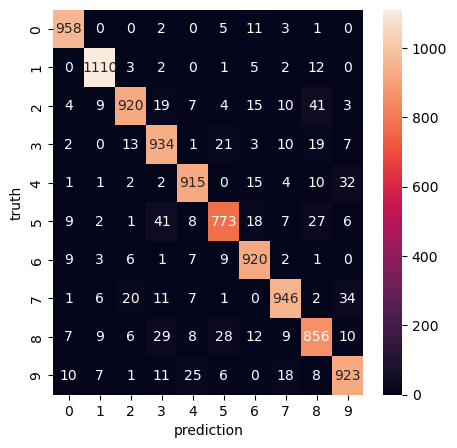

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(cm , annot = True, fmt= "d")
plt.xlabel("prediction")
plt.ylabel("truth")


In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = "relu"),
    keras.layers.Dense(10, input_shape=(784,), activation = "sigmoid")

])

model.compile(
    optimizer = "adam",
    loss= "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train, y_train, epochs = 10)

C:\Users\sanjay\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8632 - loss: 0.4751
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9611 - loss: 0.1320
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9727 - loss: 0.0917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9790 - loss: 0.0696
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9838 - loss: 0.0530
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9875 - loss: 0.0416
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9900 - loss: 0.0342
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9908 - loss: 0.0296
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9938 - loss: 0.0227
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9945 - loss: 0.0198


In [29]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [30]:
cm  = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    1,    0,    1,    0,    5,    0,    1,    0],
       [   0, 1125,    2,    1,    0,    1,    2,    1,    3,    0],
       [   6,    5,  993,    4,    2,    0,    3,    7,   11,    1],
       [   0,    0,    1,  994,    1,    1,    1,    5,    6,    1],
       [   2,    0,    3,    0,  956,    0,    7,    1,    3,   10],
       [   3,    0,    0,   14,    1,  859,    8,    2,    4,    1],
       [   2,    1,    0,    1,    6,    5,  939,    1,    3,    0],
       [   1,    5,    6,    1,    1,    0,    0, 1003,    4,    7],
       [   7,    0,    1,    6,    1,    3,    3,    3,  948,    2],
       [   2,    4,    0,    9,    8,    6,    1,    3,    4,  972]])>

In [31]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.0995


[0.08459528535604477, 0.9761000275611877]